In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling 
import plotly.offline as po
import plotly.graph_objs as go
%matplotlib inline

In [4]:
#pip install pandas-profiling

In [5]:
# load the dataset
dataset = pd.read_csv("TelCustomerCustomerData.csv")

In [6]:
# set the for show max columns
pd.set_option('display.max_columns', 21)

In [7]:
dataset.head(10)

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   
5  9305-CDSKC  Female              0      No         No       8          Yes   
6  1452-KIOVK    Male              0      No        Yes      22          Yes   
7  6713-OKOMC  Female              0      No         No      10           No   
8  7892-POOKP  Female              0     Yes         No      28          Yes   
9  6388-TABGU    Male              0      No        Yes      62          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   
5               Yes     Fiber optic             No           No   
6               Yes     Fiber optic             No          Yes   
7  No phone service             DSL            Yes           No   
8               Yes     Fiber optic             No           No   
9                No             DSL            Yes          Yes   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   
5              Yes          No         Yes             Yes  Month-to-month   
6               No          No         Yes              No  Month-to-month   
7               No          No          No              No  Month-to-month   
8              Yes         Yes         Yes             Yes  Month-to-month   
9               No          No          No              No        One year   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
0              Yes           Electronic check           29.85        29.85   
1               No               Mailed check           56.95       1889.5   
2              Yes               Mailed check           53.85       108.15   
3               No  Bank transfer (automatic)           42.30      1840.75   
4              Yes           Electronic check           70.70       151.65   
5              Yes           Electronic check           99.65        820.5   
6              Yes    Credit card (automatic)           89.10       1949.4   
7               No               Mailed check           29.75        301.9   
8              Yes           Electronic check          104.80      3046.05   
9               No  Bank transfer (automatic)           56.15      3487.95   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes  
5   Yes  
6    No  
7    No  
8   Yes  
9    No

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
dataset.shape

(7043, 21)

In [10]:
dataset.describe()

SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000

In [11]:
#dataset['TotalCharges'].astype('float', copy=False)

In [12]:
# Checking null value in 'TotalCharges'
dataset['TotalCharges'].isnull().sum()

0

In [13]:
dataset2 = dataset.copy()

In [14]:
# Changing the 'TotalCharges' into a numeric value
dataset2['TotalCharges'] = pd.to_numeric(dataset2['TotalCharges'],errors='coerce')

In [15]:
# Again cheke for null vlaue
dataset2[dataset2['TotalCharges'].isnull()]

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  \
488            No  No phone service             DSL                  Yes   
753           Yes                No              No  No internet service   
936           Yes                No             DSL                  Yes   
1082          Yes               Yes              No  No internet service   
1340           No  No phone service             DSL                  Yes   
3331          Yes                No              No  No internet service   
3826          Yes               Yes              No  No internet service   
4380          Yes                No              No  No internet service   
5218          Yes                No              No  No internet service   
6670          Yes               Yes             DSL                   No   
6754          Yes               Yes             DSL                  Yes   

             OnlineBackup     DeviceProtection          TechSupport  \
488                    No                  Yes                  Yes   
753   No internet service  No internet service  No internet service   
936                   Yes                  Yes                   No   
1082  No internet service  No internet service  No internet service   
1340                  Yes                  Yes                  Yes   
3331  No internet service  No internet service  No internet service   
3826  No internet service  No internet service  No internet service   
4380  No internet service  No internet service  No internet service   
5218  No internet service  No internet service  No internet service   
6670                  Yes                  Yes                  Yes   
6754                  Yes                   No                  Yes   

              StreamingTV      StreamingMovies  Contract PaperlessBilling  \
488                   Yes                   No  Two year              Yes   
753   No internet service  No internet service  Two year               No   
936                   Yes                  Yes  Two year               No   
1082  No internet service  No internet service  Two year               No   
1340                  Yes                   No  Two year               No   
3331  No internet service  No internet service  Two year               No   
3826  No internet service  No internet service  Two year               No   
4380  No internet service  No internet service  Two year               No   
5218  No internet service  No internet service  One year              Yes   
6670                  Yes                   No  Two year               No   
6754                   No                   No  Two year              Yes   

                  PaymentMethod  MonthlyCharges  TotalCharges Churn  
488   Bank transfer (automatic)           52.55           NaN    No  
753                Mailed check           20.25           NaN    No  
936                Mailed check           80.85           NaN    No  
1082               Mailed check           25.75           NaN    No  
1340    Credit card (automatic)           56.05           NaN    No  
3331               Mailed check           19.85       

In [16]:
dataset3 = dataset2.copy()

In [17]:
dataset3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [18]:
dataset3.dropna(inplace=True)

In [19]:
dataset3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [20]:
dataset3.head(10)

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   
5  9305-CDSKC  Female              0      No         No       8          Yes   
6  1452-KIOVK    Male              0      No        Yes      22          Yes   
7  6713-OKOMC  Female              0      No         No      10           No   
8  7892-POOKP  Female              0     Yes         No      28          Yes   
9  6388-TABGU    Male              0      No        Yes      62          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   
5               Yes     Fiber optic             No           No   
6               Yes     Fiber optic             No          Yes   
7  No phone service             DSL            Yes           No   
8               Yes     Fiber optic             No           No   
9                No             DSL            Yes          Yes   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   
5              Yes          No         Yes             Yes  Month-to-month   
6               No          No         Yes              No  Month-to-month   
7               No          No          No              No  Month-to-month   
8              Yes         Yes         Yes             Yes  Month-to-month   
9               No          No          No              No        One year   

  PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  \
0              Yes           Electronic check           29.85         29.85   
1               No               Mailed check           56.95       1889.50   
2              Yes               Mailed check           53.85        108.15   
3               No  Bank transfer (automatic)           42.30       1840.75   
4              Yes           Electronic check           70.70        151.65   
5              Yes           Electronic check           99.65        820.50   
6              Yes    Credit card (automatic)           89.10       1949.40   
7               No               Mailed check           29.75        301.90   
8              Yes           Electronic check          104.80       3046.05   
9               No  Bank transfer (automatic)           56.15       3487.95   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes  
5   Yes  
6    No  
7    No  
8   Yes  
9    No

In [21]:
dataset3.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [22]:
# Creating a Function for Ploting Subplot for All columns
def exp(columns):
    f, axs = plt.subplots(1,2,
                      figsize=(10,4),
                      sharey= False, sharex= False)
    dataset3[columns].value_counts().plot(kind='pie',autopct='%1.0f%%',ax=axs[0])
    sns.countplot(x=columns,hue='Churn' , data=dataset3,ax=axs[1])

In [23]:
num = ['gender', 'SeniorCitizen', 'Partner', 'Dependents'
       , 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'Churn']

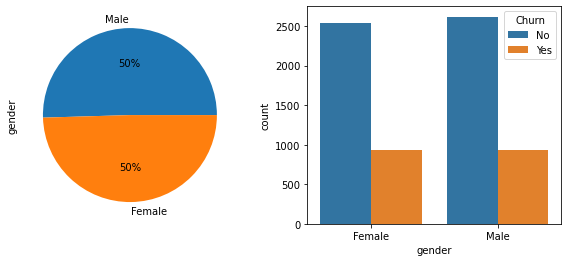

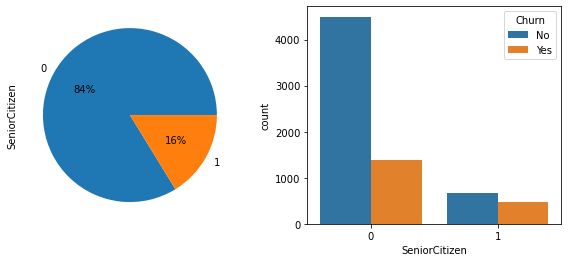

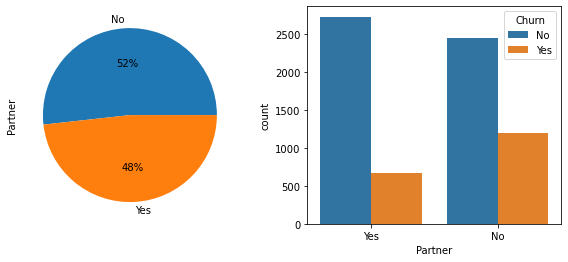

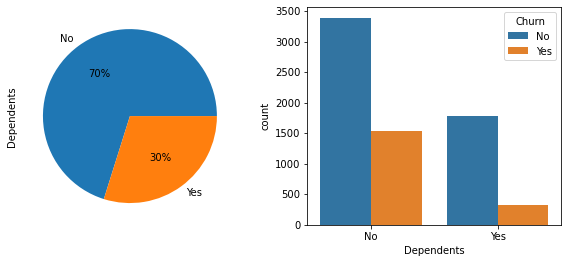

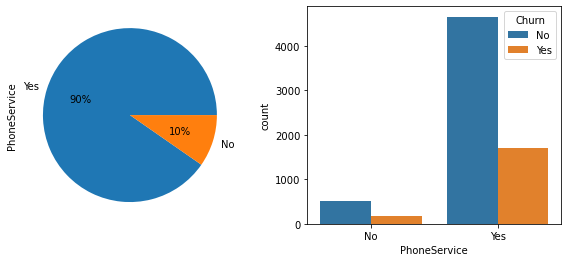

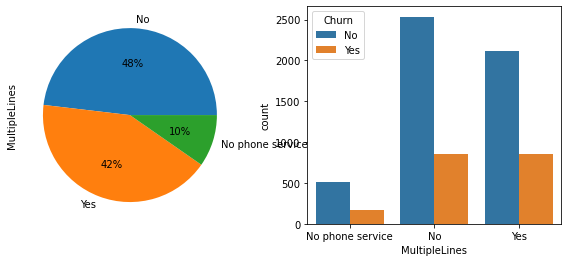

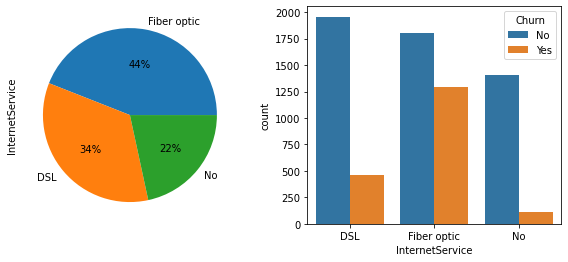

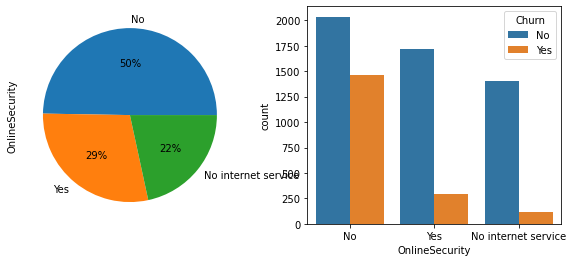

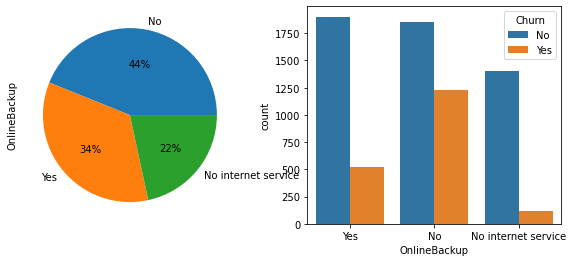

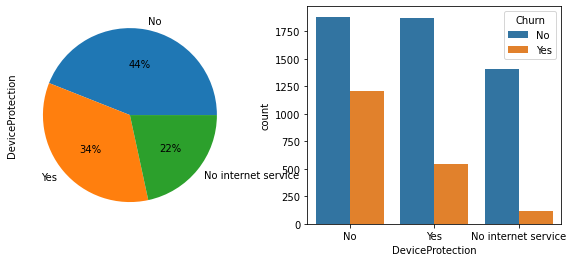

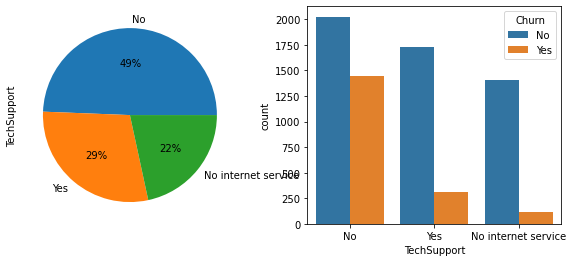

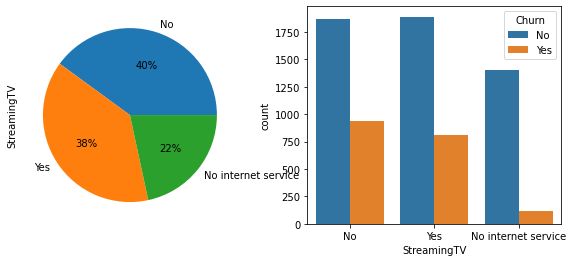

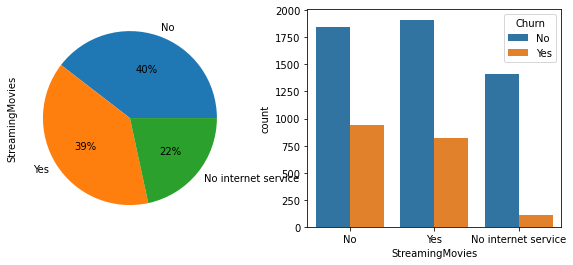

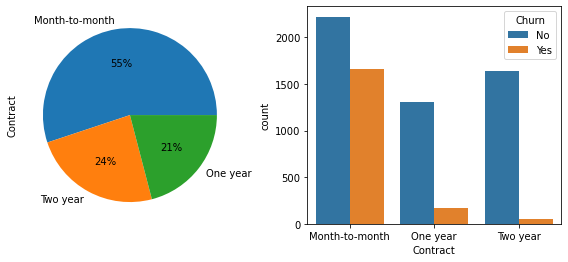

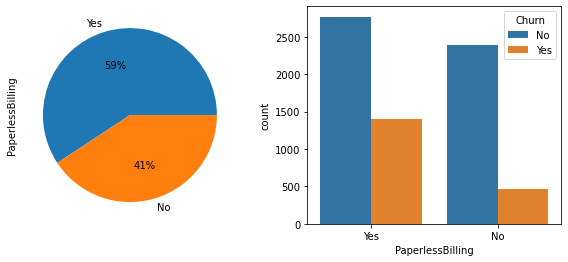

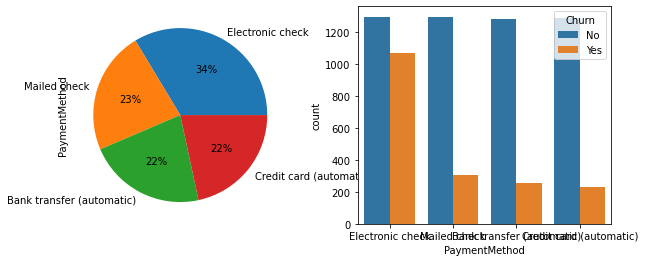

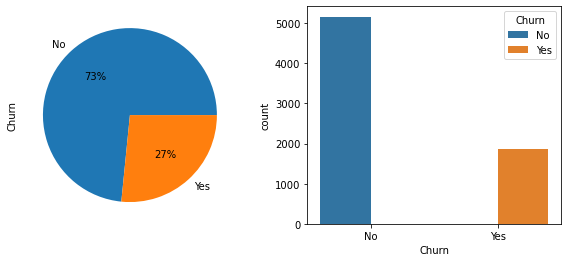

In [24]:
for feature in num:
    exp(feature)

<AxesSubplot:xlabel='Partner', ylabel='count'>

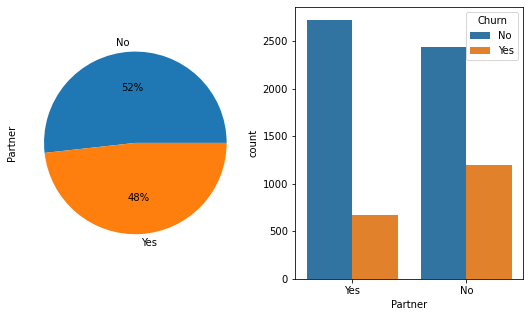

In [25]:
f, axs = plt.subplots(1,2,
                      figsize=(9,5),
                      sharey= False, sharex= False)
dataset3['Partner'].value_counts().plot(kind='pie',autopct='%1.0f%%',ax=axs[0])
sns.countplot(x="Partner",hue='Churn' , data=dataset3,ax=axs[1])

<AxesSubplot:xlabel='gender', ylabel='count'>

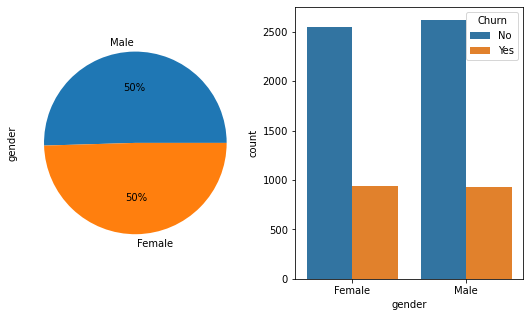

In [26]:


f, axs = plt.subplots(1,2,
                      figsize=(9,5),
                      sharey= False, sharex= False)
dataset3['gender'].value_counts().plot(kind='pie',autopct='%1.0f%%',ax=axs[0])
sns.countplot(x="gender",hue='Churn' , data=dataset3,ax=axs[1])

<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

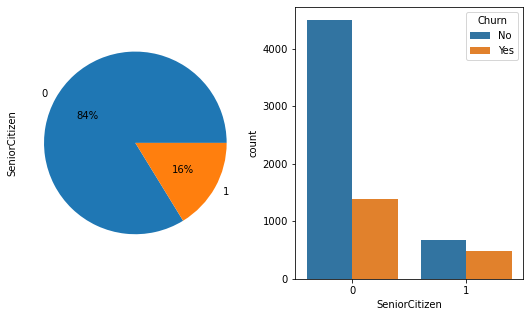

In [27]:
f, axs = plt.subplots(1,2,
                      figsize=(9,5),
                      sharey= False, sharex= False)
dataset3['SeniorCitizen'].value_counts().plot(kind='pie',autopct='%1.0f%%',ax=axs[0])
sns.countplot(x="SeniorCitizen",hue='Churn' , data=dataset3,ax=axs[1])

<AxesSubplot:xlabel='Dependents', ylabel='count'>

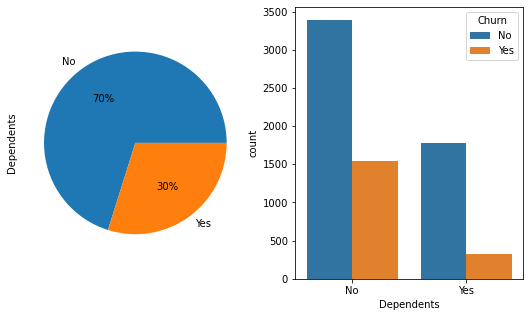

In [28]:
f, axs = plt.subplots(1,2,
                      figsize=(9,5),
                      sharey= False, sharex= False)
dataset3['Dependents'].value_counts().plot(kind='pie',autopct='%1.0f%%',ax=axs[0])
sns.countplot(x="Dependents",hue='Churn' , data=dataset3,ax=axs[1])

<AxesSubplot:xlabel='PhoneService', ylabel='count'>

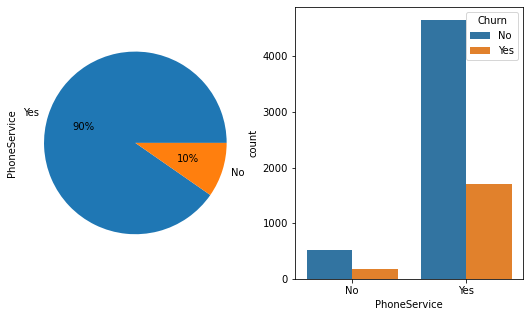

In [29]:
f, axs = plt.subplots(1,2,
                      figsize=(9,5),
                      sharey= False, sharex= False)
dataset3['PhoneService'].value_counts().plot(kind='pie',autopct='%1.0f%%',ax=axs[0])
sns.countplot(x="PhoneService",hue='Churn' , data=dataset3,ax=axs[1])

In [30]:
dataset3.replace('No phone service', 'No', inplace =True)

<AxesSubplot:xlabel='MultipleLines', ylabel='count'>

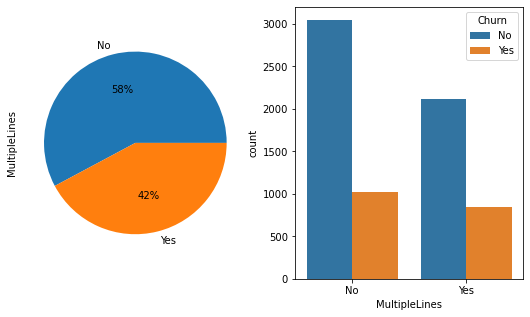

In [31]:
f, axs = plt.subplots(1,2,
                      figsize=(9,5),
                      sharey= False, sharex= False)
dataset3['MultipleLines'].value_counts().plot(kind='pie',autopct='%1.0f%%',ax=axs[0])
sns.countplot(x="MultipleLines",hue='Churn' , data=dataset3,ax=axs[1])

<AxesSubplot:xlabel='InternetService', ylabel='count'>

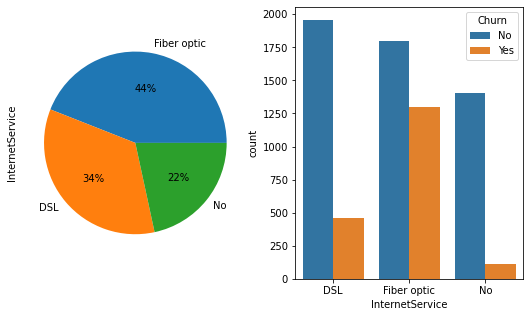

In [32]:
f, axs = plt.subplots(1,2,
                      figsize=(9,5),
                      sharey= False, sharex= False)
dataset3['InternetService'].value_counts().plot(kind='pie',autopct='%1.0f%%',ax=axs[0])
sns.countplot(x="InternetService",hue='Churn' , data=dataset3,ax=axs[1])

<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

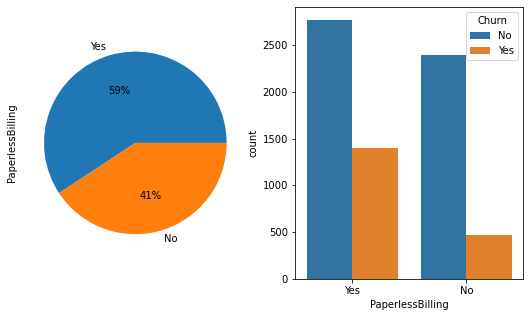

In [33]:
f, axs = plt.subplots(1,2,
                      figsize=(9,5),
                      sharey= False, sharex= False)
dataset3['PaperlessBilling'].value_counts().plot(kind='pie',autopct='%1.0f%%',ax=axs[0])
sns.countplot(x="PaperlessBilling",hue='Churn' , data=dataset3,ax=axs[1])

<AxesSubplot:xlabel='Churn', ylabel='count'>

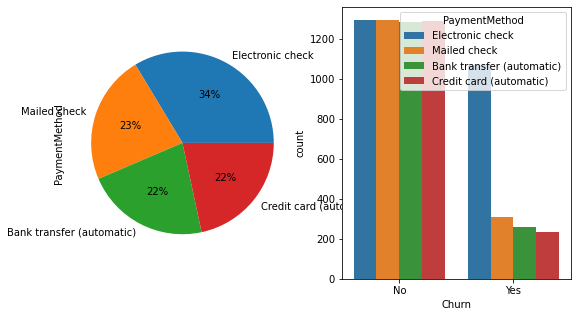

In [34]:
f, axs = plt.subplots(1,2,
                      figsize=(9,5),
                      sharey= False, sharex= False)
dataset3['PaymentMethod'].value_counts().plot(kind='pie',autopct='%1.0f%%',ax=axs[0])
sns.countplot(x="Churn",hue='PaymentMethod' , data=dataset3,ax=axs[1])


In [35]:
def exp2(columns):
    sns.histplot(data=dataset, x=columns, hue='Churn')
    plt.show()

In [36]:
num = ['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService','OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges','Churn']

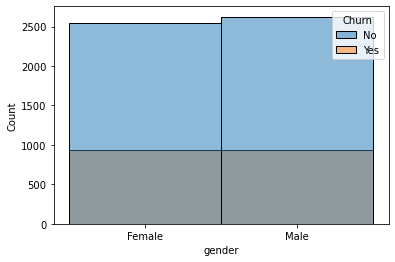

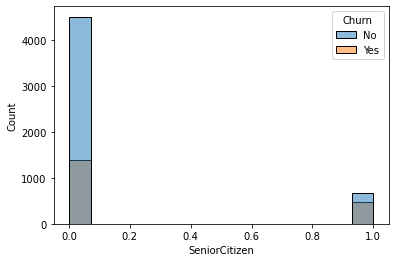

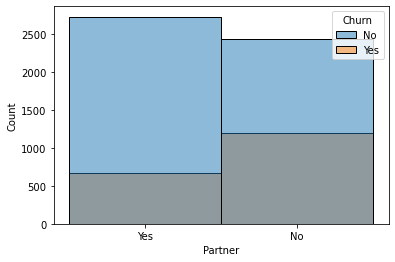

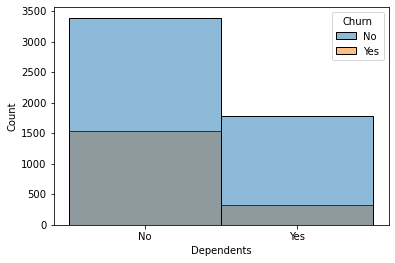

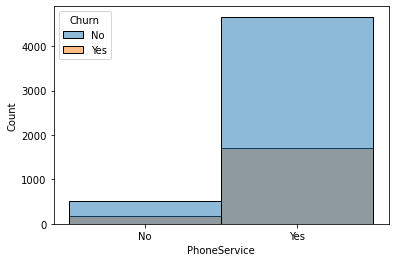

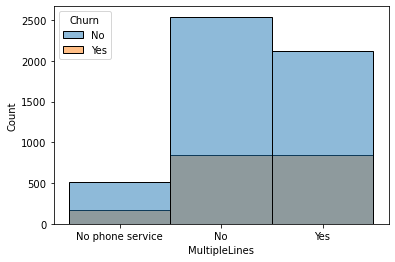

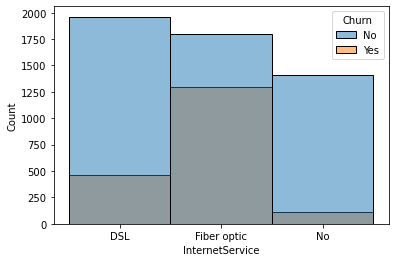

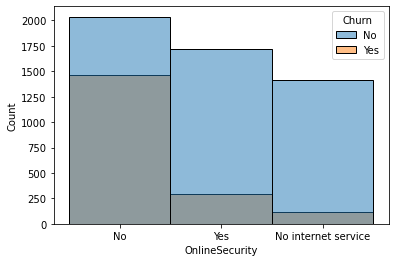

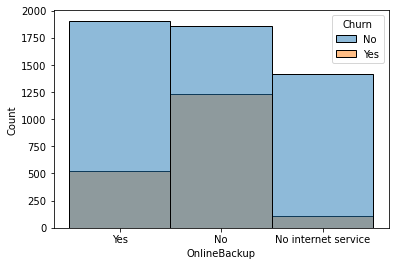

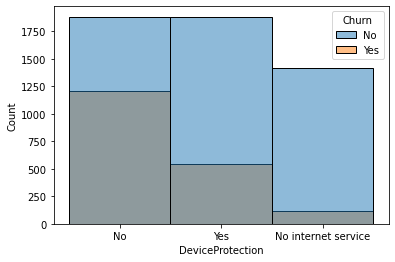

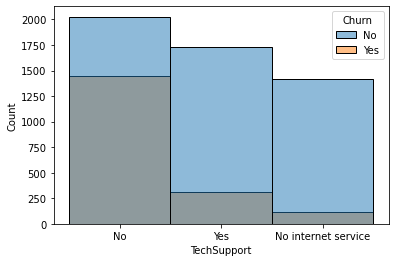

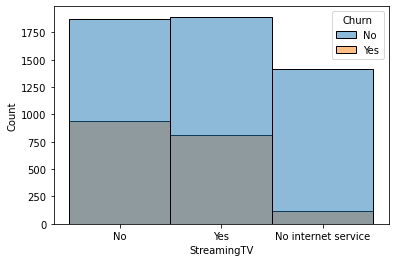

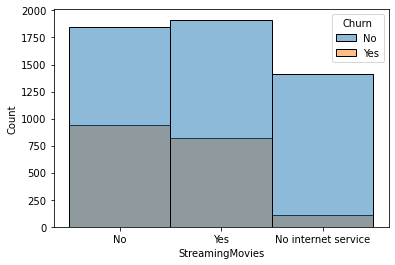

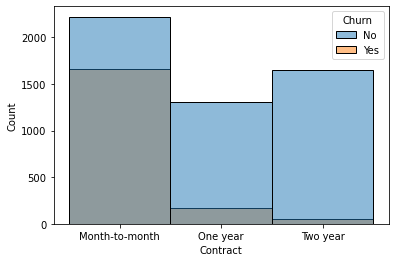

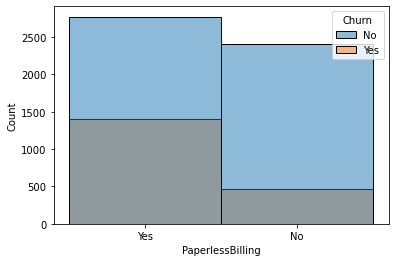

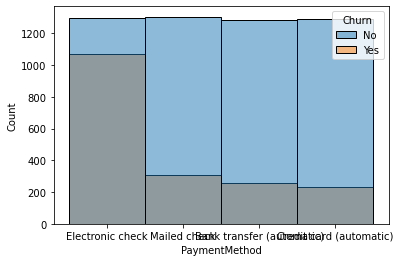

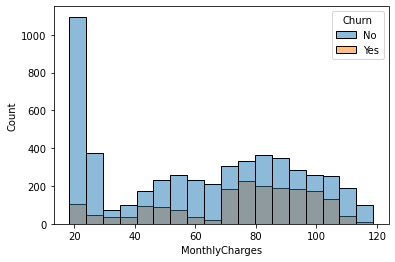

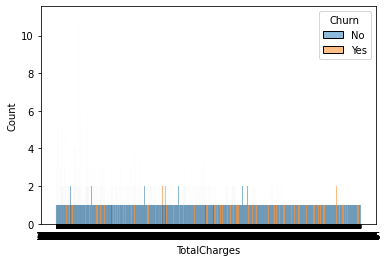

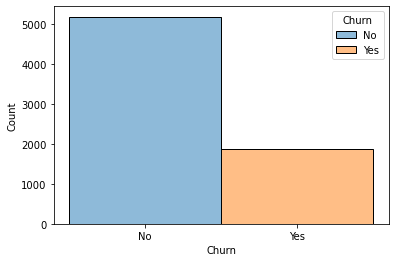

In [37]:
for feature in num:
    exp2(feature)

In [39]:
f =dataset3.corr()

In [40]:
f

SeniorCitizen    tenure  MonthlyCharges  TotalCharges
SeniorCitizen        1.000000  0.015683        0.219874      0.102411
tenure               0.015683  1.000000        0.246862      0.825880
MonthlyCharges       0.219874  0.246862        1.000000      0.651065
TotalCharges         0.102411  0.825880        0.651065      1.000000

<AxesSubplot:>

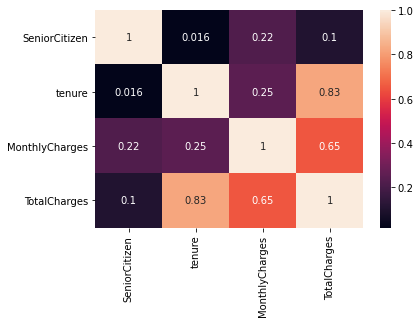

In [41]:
#import matplotlib.style as style
#style.use('fivethirtyeight')
#sns.set(rc={'figure.figsize':(11.7,8.27)})
# Checking Correlations
sns.heatmap(f,annot=True)

In [42]:
#pandas_profiling.ProfileReport(pd.read_csv('Telco-Customer-Churn.csv'))

In [43]:
dataset3.drop('customerID',axis=1, inplace=True)

In [44]:
# Dataset 4 will be use for desicion tree Model
dataset4 = dataset3.copy()

In [45]:
# Droping Total Charges Because of Multicolinearlity
dataset3.drop('TotalCharges',axis=1, inplace=True)

In [46]:
dataset3.head()

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

  MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection  \
0            No             DSL             No          Yes               No   
1            No             DSL            Yes           No              Yes   
2            No             DSL            Yes          Yes               No   
3            No             DSL            Yes           No              Yes   
4            No     Fiber optic             No           No               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod  MonthlyCharges Churn  
0           Electronic check           29.85    No  
1               Mailed check           56.95    No  
2               Mailed check           53.85   Yes  
3  Bank transfer (automatic)           42.30    No  
4           Electronic check           70.70   Yes

In [47]:
dataset3.shape

(7032, 19)

In [48]:
dataset3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


In [49]:
# One En hot Coading for modeling
model_data = pd.get_dummies(dataset3, drop_first = True)

In [50]:
model_data.head()

SeniorCitizen  tenure  MonthlyCharges  gender_Male  Partner_Yes  \
0              0       1           29.85            0            1   
1              0      34           56.95            1            0   
2              0       2           53.85            1            0   
3              0      45           42.30            1            0   
4              0       2           70.70            0            0   

   Dependents_Yes  PhoneService_Yes  MultipleLines_Yes  \
0               0                 0                  0   
1               0                 1                  0   
2               0                 1                  0   
3               0                 0                  0   
4               0                 1                  0   

   InternetService_Fiber optic  InternetService_No  ...  StreamingTV_Yes  \
0                            0                   0  ...                0   
1                            0                   0  ...                0   
2                            0                   0  ...                0   
3                            0                   0  ...                0   
4                            1                   0  ...                0   

   StreamingMovies_No internet service  StreamingMovies_Yes  \
0                                    0                    0   
1                                    0                    0   
2                                    0                    0   
3                                    0                    0   
4                                    0                    0   

   Contract_One year  Contract_Two year  PaperlessBilling_Yes  \
0                  0                  0                     1   
1                  1                  0                     0   
2                  0                  0                     1   
3                  1                  0                     0   
4                  0                  0                     1   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                      0                               1   
1                                      0                               0   
2                                      0                               0   
3                                      0                               0   
4                                      0                               1   

   PaymentMethod_Mailed check  Churn_Yes  
0                           0          0  
1                           1          0  
2                           1          1  
3                           0          0  
4                           0          1  

[5 rows x 29 columns]

# Logistic Regression Model

In [51]:
x = model_data.drop('Churn_Yes', axis = 1)
y = model_data['Churn_Yes']

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
# Splting Dataset Into Train And test
X_train, X_test , y_train, y_test = train_test_split(x,y, test_size = 0.20, random_state=0)

In [54]:
from sklearn.linear_model import LogisticRegression

In [55]:
# Logistic Model
logmodel = LogisticRegression()

In [56]:
# Model fitting
logmodel.fit(X_train, y_train)

C:\Users\GAURAV\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [57]:
predictin = logmodel.predict(X_test)

In [58]:
from sklearn.metrics import classification_report

In [59]:
# Pridictinon For Test DataSet
print(classification_report(y_test, predictin))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1038
           1       0.65      0.53      0.59       369

    accuracy                           0.80      1407
   macro avg       0.75      0.72      0.73      1407
weighted avg       0.79      0.80      0.80      1407



In [60]:
# Prediction for Train DataSet
predictin1 = logmodel.predict(X_train)

In [61]:
print(classification_report(y_train, predictin1))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      4125
           1       0.66      0.55      0.60      1500

    accuracy                           0.80      5625
   macro avg       0.75      0.72      0.73      5625
weighted avg       0.79      0.80      0.80      5625



In [62]:
from sklearn.metrics import confusion_matrix

In [63]:
# Confistion Matrix
confusion_matrix(y_test, predictin)

array([[933, 105],
       [173, 196]], dtype=int64)

In [64]:
from sklearn.metrics import accuracy_score

In [65]:
# Accuracy For Test  DataSet
accuracy_score(y_test,  predictin)

0.8024164889836531

In [66]:
# Accuracy for 
accuracy_score(y_train,  predictin1)

0.8028444444444445

In [67]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import sklearn.metrics as metrics

In [68]:
#probs = Model.Lgpredict_proba(X_test)
#preds = predictin[:,1]

prob = logmodel.predict_proba(X_test)

prob_train =logmodel.predict_proba(X_train)


fpr, tpr, thershold = metrics.roc_curve(y_test, prob[:,1], pos_label=1)
fpr1, tpr2, thershold2 = metrics.roc_curve(y_train, prob_train[:,1], pos_label=1)

In [69]:
random_probs = [0 for i in range(len(y_test))]
#roc_auc = metrics.auc(fpr, tpr)

p_fpr, p_tpr , _ = roc_curve(y_test, random_probs, pos_label = 1)

p_fpr1, p_tpr1 , __ = roc_curve(y_test, random_probs, pos_label = 1)

In [70]:
auc_score = roc_auc_score(y_test, prob[:,1])
auc_score1 = roc_auc_score(y_train, prob_train[:,1])

print("Test Accuracy:",auc_score)
print("Train Accuracy:",auc_score1)

Test Accuracy: 0.8351804857162252
Train Accuracy: 0.8479502222222224


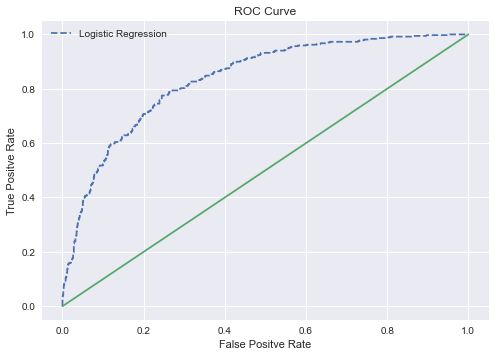

In [71]:
plt.style.use('seaborn')
plt.plot(fpr, tpr, linestyle='--', label =  'Logistic Regression')
plt.plot(p_fpr, p_tpr)
plt.title("ROC Curve")
plt.xlabel('False Positve Rate')
plt.ylabel('True Positve Rate')
plt.legend(loc='best')
plt.show()

# DecisionTreeClassifier Model

In [72]:
import pandas
from sklearn import tree
import pydotplus
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
from IPython.display import Image  


In [73]:
import graphviz

In [74]:
feature = x.columns

In [75]:
# Create decision tree classifer object
clf = DecisionTreeClassifier(random_state=0)

# Train model
model = clf.fit(x, y)

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.424229 to fit



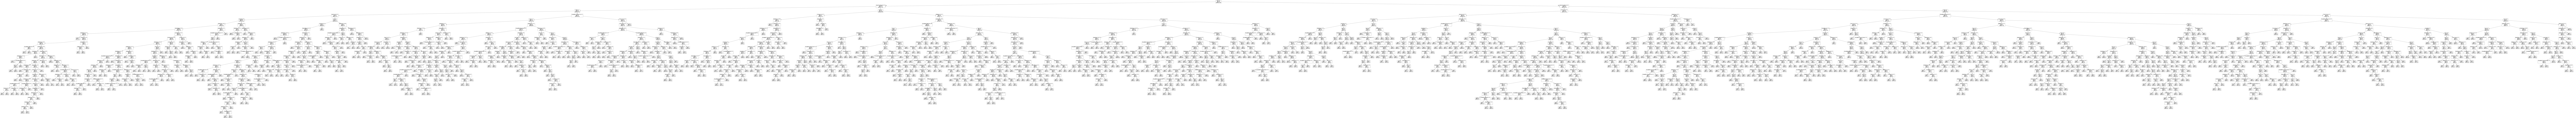

In [76]:
# Create DOT data
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=feature)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

In [ ]:
feature = x.columns

In [ ]:
feature

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.423505 to fit



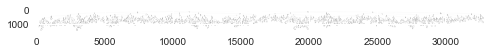

In [79]:
import graphviz
dtree = DecisionTreeClassifier()
dtree = dtree.fit(x, y)
data = tree.export_graphviz(dtree, out_file=None, feature_names=feature)
graph = pydotplus.graph_from_dot_data(data)
graph.write_png('my1.png')

img=pltimg.imread('my1.png')
imgplot = plt.imshow(img)
plt.show()

In [80]:
dataset4.head()

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

  MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection  \
0            No             DSL             No          Yes               No   
1            No             DSL            Yes           No              Yes   
2            No             DSL            Yes          Yes               No   
3            No             DSL            Yes           No              Yes   
4            No     Fiber optic             No           No               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod  MonthlyCharges  TotalCharges Churn  
0           Electronic check           29.85         29.85    No  
1               Mailed check           56.95       1889.50    No  
2               Mailed check           53.85        108.15   Yes  
3  Bank transfer (automatic)           42.30       1840.75    No  
4           Electronic check           70.70        151.65   Yes

In [81]:
model_data2 = pd.get_dummies(dataset4, drop_first = True)

In [82]:
x = model_data2.drop('Churn_Yes', axis = 1)
y = model_data2['Churn_Yes']

In [83]:
X_train, X_test , y_train, y_test = train_test_split(x,y, test_size = 0.30, random_state=100)

In [84]:
clf_entropy = DecisionTreeClassifier(criterion = "entropy", 
                                    random_state = 100, max_depth = 11, min_samples_leaf=12)
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=11, min_samples_leaf=12,
                       random_state=100)

In [85]:
y_pred_en = clf_entropy.predict(X_test)


In [86]:
y_pred_en 

array([0, 0, 0, ..., 0, 1, 0], dtype=uint8)

In [87]:
print(("Accuracy is "), accuracy_score(y_test,y_pred_en)*100)

Accuracy is  76.54028436018957


In [88]:
from sklearn.metrics import roc_curve, auc

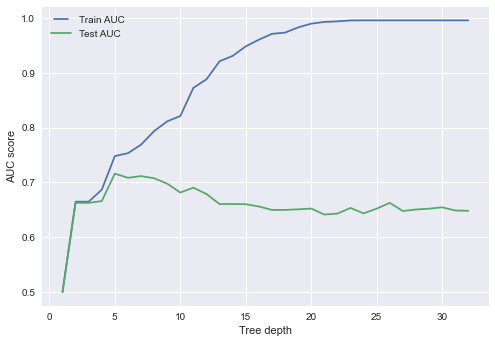

In [89]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
    dt = DecisionTreeClassifier(max_depth=max_depth)
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous train results
    train_results.append(roc_auc)
    y_pred = dt.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous test results
    test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, label="Train AUC")
line2, = plt.plot(max_depths, test_results, label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

# Random forest 

In [90]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [91]:
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [92]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.7838862559241706


# Finding Features

In [93]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

RandomForestClassifier()

In [94]:
feature_imp = pd.Series(clf.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp

TotalCharges                             0.198126
tenure                                   0.171452
MonthlyCharges                           0.171317
InternetService_Fiber optic              0.046467
PaymentMethod_Electronic check           0.033379
Contract_Two year                        0.030504
gender_Male                              0.026126
PaperlessBilling_Yes                     0.024787
OnlineSecurity_Yes                       0.023924
TechSupport_Yes                          0.022959
Contract_One year                        0.022856
Partner_Yes                              0.022561
OnlineBackup_Yes                         0.022021
SeniorCitizen                            0.021018
Dependents_Yes                           0.020135
MultipleLines_Yes                        0.019385
DeviceProtection_Yes                     0.018920
StreamingMovies_Yes                      0.017180
StreamingTV_Yes                          0.017071
PaymentMethod_Credit card (automatic)    0.014880


No handles with labels found to put in legend.


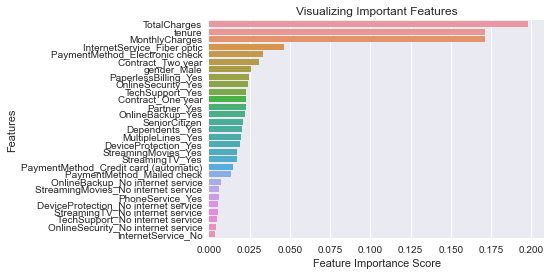

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

# Generating the Model on Selected Features

In [96]:
n= pd.DataFrame(feature_imp)

In [97]:
n.reset_index(inplace=True)

In [98]:
n

index         0
0                            TotalCharges  0.198126
1                                  tenure  0.171452
2                          MonthlyCharges  0.171317
3             InternetService_Fiber optic  0.046467
4          PaymentMethod_Electronic check  0.033379
5                       Contract_Two year  0.030504
6                             gender_Male  0.026126
7                    PaperlessBilling_Yes  0.024787
8                      OnlineSecurity_Yes  0.023924
9                         TechSupport_Yes  0.022959
10                      Contract_One year  0.022856
11                            Partner_Yes  0.022561
12                       OnlineBackup_Yes  0.022021
13                          SeniorCitizen  0.021018
14                         Dependents_Yes  0.020135
15                      MultipleLines_Yes  0.019385
16                   DeviceProtection_Yes  0.018920
17                    StreamingMovies_Yes  0.017180
18                        StreamingTV_Yes  0.017071
19  PaymentMethod_Credit card (automatic)  0.014880
20             PaymentMethod_Mailed check  0.013483
21       OnlineBackup_No internet service  0.006935
22    StreamingMovies_No internet service  0.006053
23                       PhoneService_Yes  0.005998
24   DeviceProtection_No internet service  0.005235
25        StreamingTV_No internet service  0.005145
26        TechSupport_No internet service  0.004468
27     OnlineSecurity_No internet service  0.004038
28                     InternetService_No  0.003577

In [99]:
#Import train_test_split function
#from cross_validation import train_test_split
# Split dataset into features and labels
X=model_data2[['TotalCharges','MonthlyCharges','tenure','InternetService_Fiber optic','PaymentMethod_Electronic check','gender_Male',
              'Contract_Two year','PaperlessBilling_Yes','TechSupport_Yes','OnlineSecurity_Yes','Contract_One year','OnlineBackup_Yes',
              'Partner_Yes','SeniorCitizen','Dependents_Yes','MultipleLines_Yes','DeviceProtection_Yes','StreamingTV_Yes','StreamingMovies_Yes',
              'PaymentMethod_Credit card (automatic)','PaymentMethod_Mailed check']]
y=model_data2['Churn_Yes']                                       
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.70, random_state=5) # 70% training and 30% testa

In [100]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

# prediction on test set
y_pred=clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7859029047328865
